### Step2: segment seqscope 4X HE images with cellpose

**Note**: use conda envorinment `cellpose`

need to specify some param, otherwise segs are bad

In [14]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
from cellpose import utils, io
from cellpose import models
from cellpose import plot
import cv2
import pickle
import tifffile as tifi
from matplotlib.patches import Rectangle
import matplotlib.colors as colors
import pandas as pd
from os import listdir
from os.path import isfile, join

#### Seqscope 4X HE images

In [2]:
##### all available seqsocpe liver 4X H&E images
mypath = 'input/HE_4X/'
# filenames = [f for f in listdir(mypath) if isfile(join(mypath, f))]
filenames = ['DKO_4X_1.jpg', 'DKO_4X_2.jpg', 'DKO_4X_3.jpg', 'DKO_4X_4.jpg', 
             'wt_4X_1.jpg', 'wt_4X_2.jpg', 'wt_4X_3.jpg', 'wt_4X_4.jpg']
print(filenames)

['DKO_4X_1.jpg', 'DKO_4X_2.jpg', 'DKO_4X_3.jpg', 'DKO_4X_4.jpg', 'wt_4X_1.jpg', 'wt_4X_2.jpg', 'wt_4X_3.jpg', 'wt_4X_4.jpg']


#### Segment TD images

In [5]:
##### read images as gray scale
image_2 = cv2.imread('input/HE_4X/DKO_4X_2.jpg', 0)
image_3 = cv2.imread('input/HE_4X/DKO_4X_3.jpg', 0)
image_4 = cv2.imread('input/HE_4X/DKO_4X_4.jpg', 0)

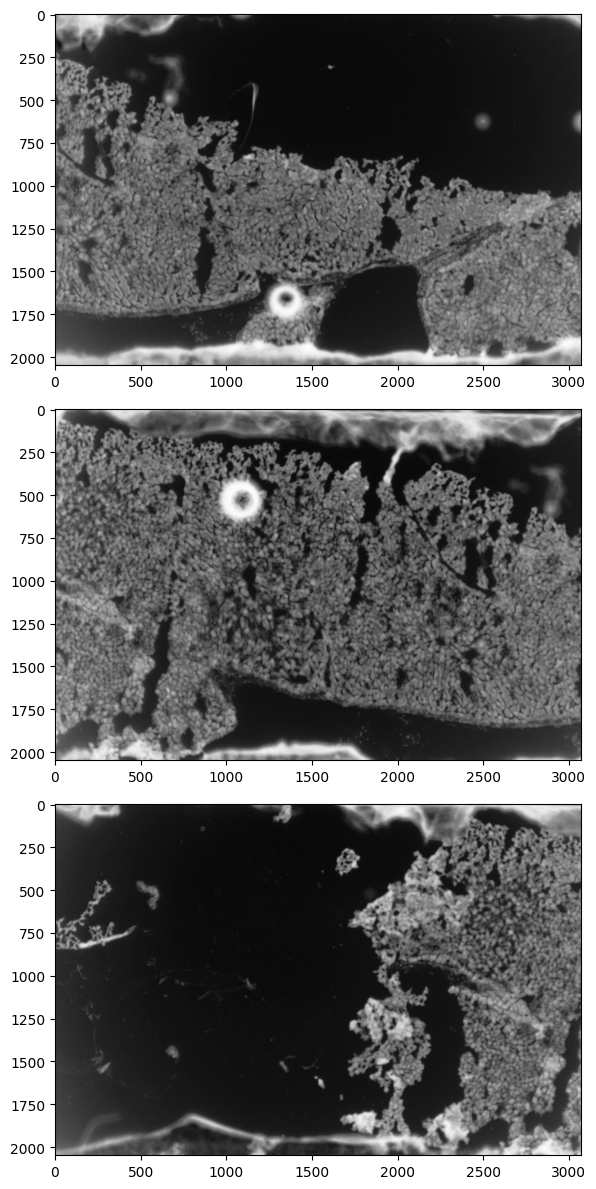

In [12]:
##### visualize
fig, ax = plt.subplots(3,1, figsize=(6,12))
ax[0].imshow(image_2, origin='upper', cmap='Greys')
ax[1].imshow(image_3, origin='upper', cmap='Greys')
ax[2].imshow(image_4, origin='upper', cmap='Greys')
plt.tight_layout()

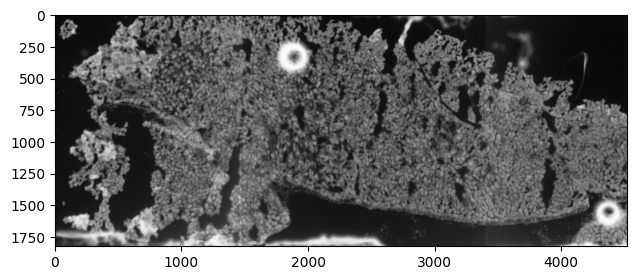

In [15]:
##### concatenate these images together
# we want to segment them together as one image, so as to have consistant segmentation results
# the index for concatenation are specified manually through visual check
image = np.concatenate((image_4[223:,1600:], image_3[200:2025,676:2600], image_2[108:1933,375:1500]), axis=1)

fig, ax = plt.subplots(1,1, figsize=(8,3))
ax.imshow(image, origin='upper', cmap='Greys')

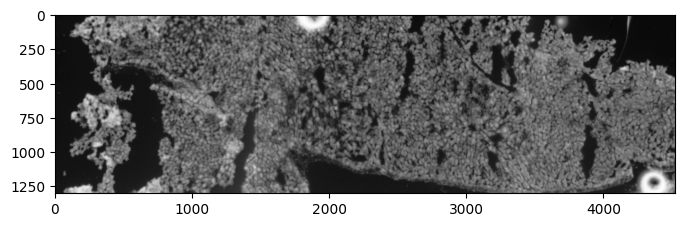

In [16]:
##### crop the concatenated image
# because we only need to segment the area with ST data
# the index are specified manually
image2 = image[330:1630,]

fig, ax = plt.subplots(1,1, figsize=(8,3))
ax.imshow(image2, origin='upper', cmap='Greys')

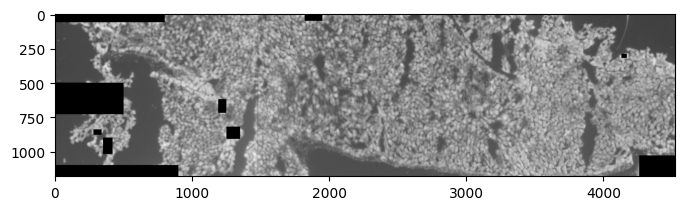

In [18]:
##### remove selected area manually for better cellpose segmentation results
# indeces are specified manually
img = image[420:1600,].copy()
img[:50,1820:1950] = 255
img[:60,:800] = 255
img[500:730,:500] = 255
img[840:880,280:340] = 255
img[900:1020,350:420] = 255
img[900:1020,350:420] = 255
img[620:720,1190:1250] = 255
img[1030:,4260:] = 255
img[820:910,1250:1350] = 255
img[290:320,4130:4170] = 255
img[1100:,:900] = 255

fig, ax = plt.subplots(1,1, figsize=(8,3))
ax.imshow(img, origin='upper', cmap='Greys')

In [ ]:
##### RUN CELLPOSE

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type='cyto')

# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus
chan = [0,0]

# segment
# Note: better use diameter=30 than diameter=None
#masks, flows, styles, diams = model.eval(img, diameter=None, channels=chan)
masks, flows, styles, diams = model.eval(img, diameter=30, channels=chan)

# save
filename = 'output_step2/TD'
io.masks_flows_to_seg(img, masks, flows, diams, filename, chan)
io.save_to_png(img, masks, flows, filename)

# DISPLAY RESULTS 
mpl.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, img, masks, flows[0], channels=chan)
plt.tight_layout()

#### Segment health images

In [19]:
##### read images
image_1 = cv2.imread('input/HE_4X/wt_4X_1.jpg', 0)
image_2 = cv2.imread('input/HE_4X/wt_4X_2.jpg', 0)
image_3 = cv2.imread('input/HE_4X/wt_4X_3.jpg', 0)

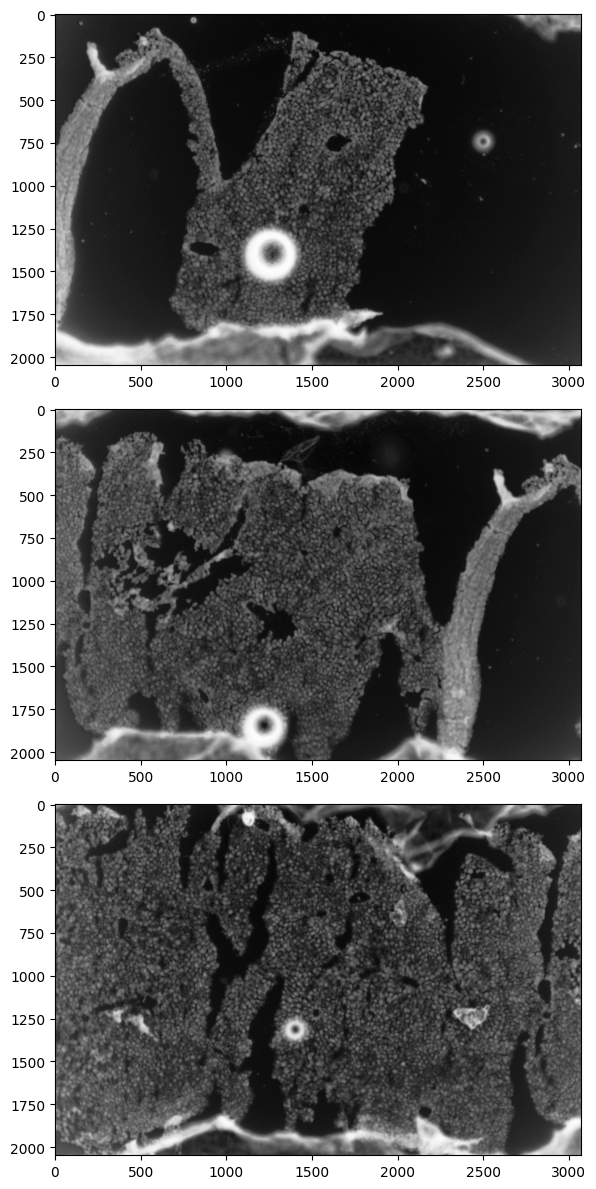

In [21]:
##### visualize
fig, ax = plt.subplots(3,1, figsize=(6,12))
ax[0].imshow(image_1, origin='upper', cmap='Greys')
ax[1].imshow(image_2, origin='upper', cmap='Greys')
ax[2].imshow(image_3, origin='upper', cmap='Greys')
plt.tight_layout()

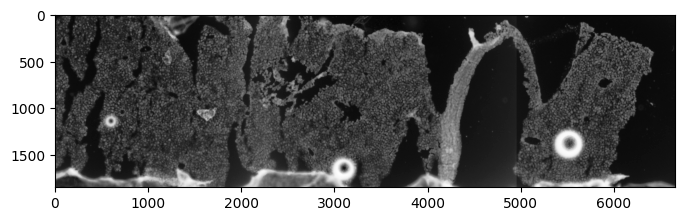

In [22]:
##### concatenate these images together
# similar to the TD images, we want to segment them together as one image, so as to have consistant segmentation results
# the index for concatenation are specified manually through visual check
image = np.concatenate((image_3[172:2020,800:], image_2[200:,390:], image_1[15:1863,700:2400]), axis=1)

fig, ax = plt.subplots(1,1, figsize=(8,3))
ax.imshow(image, origin='upper', cmap='Greys')

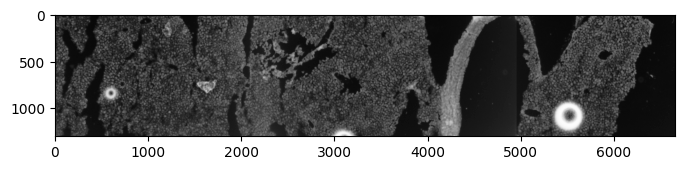

In [23]:
##### crop the concatenated image
# because we only need to segment the area with ST data
# the index are specified manually
image2 = image[300:1600,]

fig, ax = plt.subplots(1,1, figsize=(8,3))
ax.imshow(image2, origin='upper', cmap='Greys')

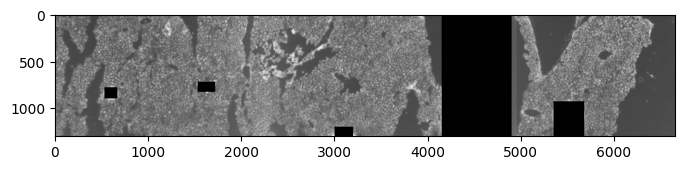

In [24]:
##### remove selected area manually for better cellpose segmentation results
# indeces are specified manually
img = image2.copy()
img[930:,5350:5680]=255
img[1200:,3000:3200]=255
img[780:900,530:670]=255
img[720:830,1530:1720]=255
img[:,4150:4900]=255

fig, ax = plt.subplots(1,1, figsize=(8,3))
ax.imshow(img, origin='upper', cmap='Greys')

In [ ]:
##### RUN CELLPOSE
# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type='cyto')

# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus
chan = [0,0]

# segment
# Note: better use diameter=30 than diameter=None, also save time
#masks, flows, styles, diams = model.eval(img, diameter=None, channels=chan)
masks, flows, styles, diams = model.eval(img, diameter=30, channels=chan)

# save
filename = 'output_step2/H'
io.masks_flows_to_seg(img, masks, flows, diams, filename, chan)
io.save_to_png(img, masks, flows, filename)

# DISPLAY RESULTS 
mpl.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, img, masks, flows[0], channels=chan)
plt.tight_layout()